## **Mengimport module**

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import RobustScaler, StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_validate
from sklearn.feature_selection import RFECV

from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

## **Membaca Data**

In [2]:
data = pd.read_csv("../Data/stroke_data.csv")
data.head()

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,63.0,0,1,1,4,1,228.69,36.6,1,1
1,1.0,42.0,0,1,1,4,0,105.92,32.5,0,1
2,0.0,61.0,0,0,1,4,1,171.23,34.4,1,1
3,1.0,41.0,1,0,1,3,0,174.12,24.0,0,1
4,1.0,85.0,0,0,1,4,1,186.21,29.0,1,1


## **Preprocessing Data**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40910 entries, 0 to 40909
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sex                40907 non-null  float64
 1   age                40910 non-null  float64
 2   hypertension       40910 non-null  int64  
 3   heart_disease      40910 non-null  int64  
 4   ever_married       40910 non-null  int64  
 5   work_type          40910 non-null  int64  
 6   Residence_type     40910 non-null  int64  
 7   avg_glucose_level  40910 non-null  float64
 8   bmi                40910 non-null  float64
 9   smoking_status     40910 non-null  int64  
 10  stroke             40910 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 3.4 MB


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
sex,40907.0,0.555162,0.496954,0.00,0.00,1.00,1.00,1.00
age,40910.0,51.327255,21.623969,-9.00,35.00,52.00,68.00,103.00
hypertension,40910.0,0.213835,0.410017,0.00,0.00,0.00,0.00,1.00
heart_disease,40910.0,0.127719,0.333781,0.00,0.00,0.00,0.00,1.00
ever_married,40910.0,0.821340,0.383072,0.00,1.00,1.00,1.00,1.00
work_type,40910.0,3.461134,0.780919,0.00,3.00,4.00,4.00,4.00
Residence_type,40910.0,0.514886,0.499784,0.00,0.00,1.00,1.00,1.00
avg_glucose_level,40910.0,122.075901,57.561531,55.12,78.75,97.92,167.59,271.74
bmi,40910.0,30.406355,6.835072,11.50,25.90,29.40,34.10,92.00
smoking_status,40910.0,0.488609,0.499876,0.00,0.00,0.00,1.00,1.00


In [5]:
##Mengecek nilai kosong (missing value)
data.isna().sum()

sex                  3
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [6]:
data = data.dropna()
data.isna().sum()

sex                  0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [7]:
##Mengubah tipe kolom
categorical_columns = ['sex', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']
data[categorical_columns] = data[categorical_columns].astype('category')

In [10]:
##Menyeleksi variabel (feature selection)
X = data.drop(["stroke"], axis = 1)
y = data["stroke"]

estimator = DecisionTreeClassifier(max_depth=5,min_samples_split=100)
rfecv = RFECV(estimator=estimator, cv=StratifiedKFold(10, random_state=42, shuffle=True), scoring="accuracy")
rfecv.fit(X, y)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
      estimator=DecisionTreeClassifier(max_depth=5, min_samples_split=100),
      scoring='accuracy')

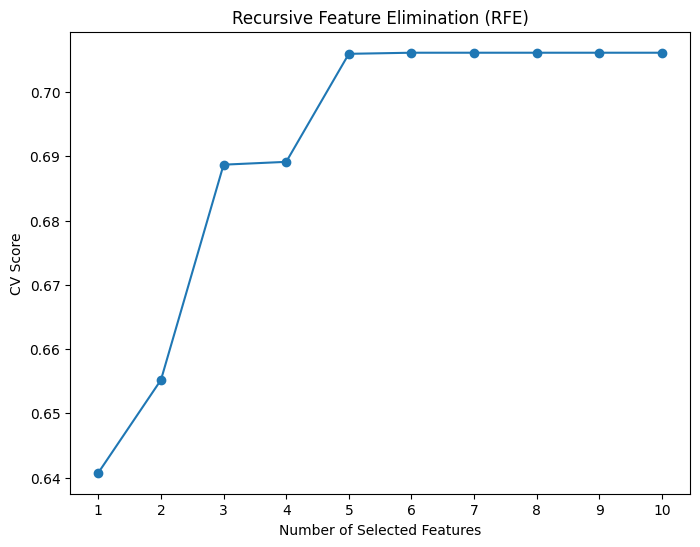

The optimal number of features: 6


In [11]:
##Plot RFE
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'], marker='o')
plt.xticks(range(1, X.shape[1] + 1))
plt.xlabel("Number of Selected Features")
plt.ylabel("CV Score")
plt.title("Recursive Feature Elimination (RFE)")
plt.show()

print("The optimal number of features: {}".format(rfecv.n_features_))

In [12]:
##Prediktor terpilih
selected_features = X.columns[rfecv.support_]
X_selected = X[selected_features]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)

In [14]:
X_selected.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40907 entries, 0 to 40909
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   hypertension       40907 non-null  category
 1   heart_disease      40907 non-null  category
 2   ever_married       40907 non-null  category
 3   work_type          40907 non-null  category
 4   avg_glucose_level  40907 non-null  float64 
 5   bmi                40907 non-null  float64 
dtypes: category(4), float64(2)
memory usage: 1.1 MB


c:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


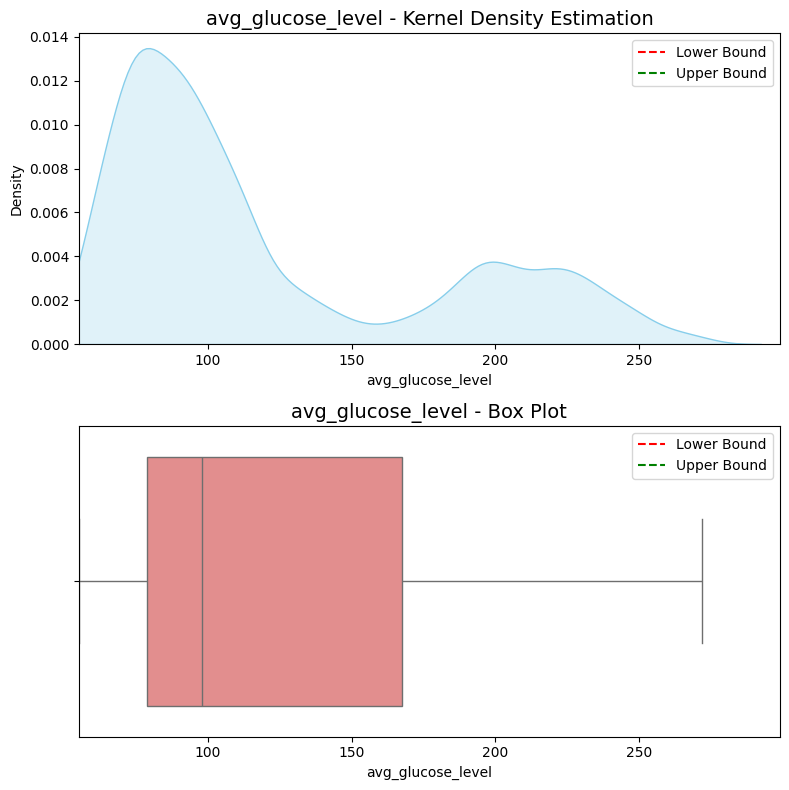

c:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


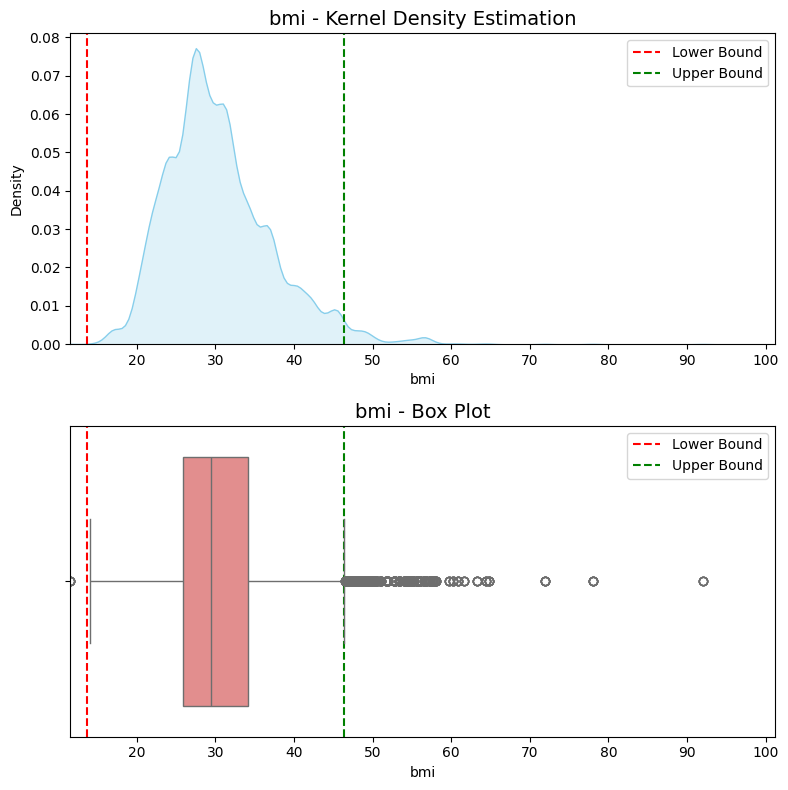

In [17]:
##Mengecek outlier
numerical_columns = X_selected.select_dtypes(include=['float64', 'int64']).columns

for i in numerical_columns:
    q25, q75 = np.percentile(data[i], [25, 75])
    iqr = q75 - q25
    lower_bound = q25 - iqr * 1.5
    upper_bound = q75 + iqr * 1.5

    plt.figure(figsize=(8, 8))

    plt.subplot(211)
    plt.xlim(data[i].min(), data[i].max() * 1.1)
    plt.axvline(x=lower_bound, color='red', linestyle='--', label='Lower Bound')
    plt.axvline(x=upper_bound, color='green', linestyle='--', label='Upper Bound')
    sns.kdeplot(data[i], fill=True, color='skyblue')
    plt.legend()
    plt.title(f'{i} - Kernel Density Estimation', fontsize=14)
    plt.grid(False) 

    plt.subplot(212)
    plt.xlim(data[i].min(), data[i].max() * 1.1)
    plt.axvline(x=lower_bound, color='red', linestyle='--', label='Lower Bound')
    plt.axvline(x=upper_bound, color='green', linestyle='--', label='Upper Bound')
    sns.boxplot(x=data[i], color='lightcoral')
    plt.legend()
    plt.title(f'{i} - Box Plot', fontsize=14)
    plt.grid(False) 
    
    plt.tight_layout() 
    plt.show()


In [19]:
##Menghapus outlier
columns_to_check = ['bmi']

for i in columns_to_check:
    q25, q75 = np.percentile(data[i], [25, 75])
    iqr = q75 - q25
    
    lower_bound = q25 - iqr * 1.5
    upper_bound = q75 + iqr * 1.5
    
    data.loc[data[i] < lower_bound, i] = lower_bound
    data.loc[data[i] > upper_bound, i] = upper_bound

c:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\acer\AppData\Local\Programs\Python\Python311\Lib

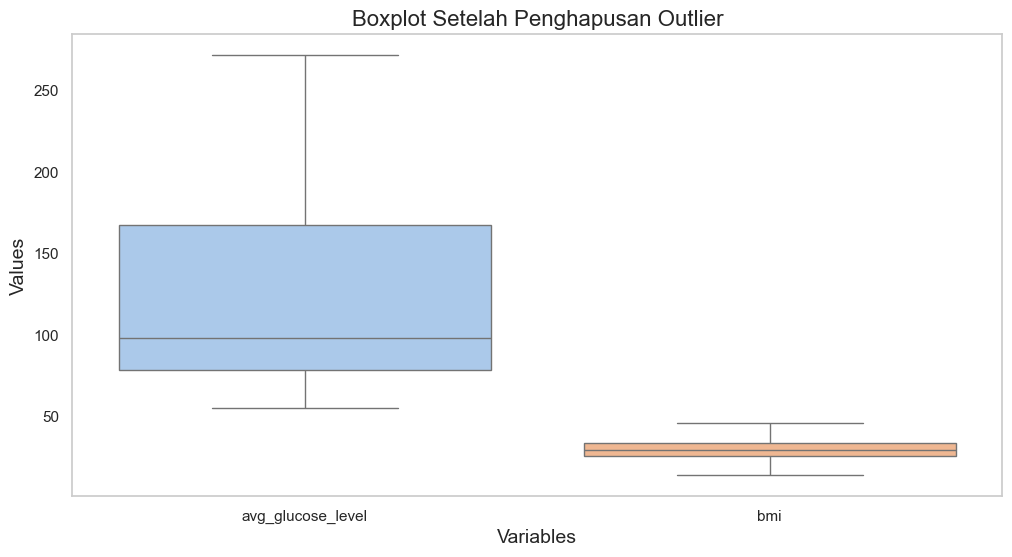

In [20]:
##Mengecek outlier setelah dihapus
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))  

boxplot = sns.boxplot(data=X_selected, palette='pastel', showfliers=False)
plt.title('Boxplot Setelah Penghapusan Outlier', fontsize=16)
plt.xlabel('Variables', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.grid(False)

In [23]:
data['stroke'].value_counts()

stroke
1    20460
0    20447
Name: count, dtype: int64

In [25]:
##Mengatasi imbalance data
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [26]:
y_train.value_counts()

stroke
0    16368
1    16368
Name: count, dtype: int64

In [34]:
##Menstandarisasi data
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## **Melakukan Klasifikasi**

In [32]:
xg = XGBClassifier(n_estimators=350)
xg.fit(X_train, y_train)
xg_preds = xg.predict(X_test)
print(classification_report(y_test, xg_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4090
           1       1.00      1.00      1.00      4092

    accuracy                           1.00      8182
   macro avg       1.00      1.00      1.00      8182
weighted avg       1.00      1.00      1.00      8182



## **Membuat Confussion Matrix**

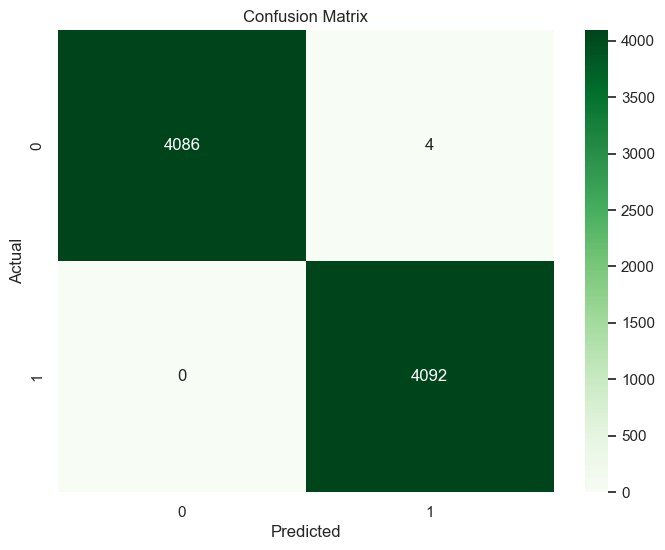

In [33]:
##Membuat confusion matrix
conf_matrix = confusion_matrix(y_test, xg_preds)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
